In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn import preprocessing
import umap
import plotly.express as px
from umap import UMAP

In [ ]:
np.random.seed(31415)

In [ ]:
df = pd.read_csv('final_dataset - final_dataset.csv')
df

,Year,Wheat_Production,Wheat_Ethanol production from commodity,Wheat_Biodiesel production from commodity,Wheat_Imports,Wheat_Consumption,Wheat_Ending stocks,Wheat_Exports,Wheat_Area harvested,Wheat_Feed,...,ROOTS AND TUBERS_Producer price,ROOTS AND TUBERS_Human consumption per capita,ROOTS AND TUBERS_Direct GHG emission,ROOTS AND TUBERS_Total Calorie availability,ROOTS AND TUBERS_Food Protein availability,ROOTS AND TUBERS_Food Fat availability,Agricultural sector_Direct GHG emission,Total Calorie availability,Food Protein availability,Food Fat availability
0,1990,74296.96,0,0,990.66,37149.84,23626.21,29110.23,27964.00,13129.00,...,0.00,11.76,0.74,0.00,0.00,0.00,356.22,0.00,0.00,0.00
1,1991,53890.40,0,0,1107.69,30797.63,12927.60,34899.08,23391.00,6654.31,...,109.00,12.46,0.74,0.00,0.00,0.00,357.55,0.00,0.00,0.00
2,1992,67136.43,0,0,1905.12,30686.04,14443.53,36839.58,25414.30,5269.02,...,122.00,12.20,0.77,96.67,2.57,0.17,364.98,3555.27,110.40,143.38
3,1993,65220.42,0,0,2961.10,33736.95,15472.30,33415.80,25373.90,7394.59,...,136.00,12.55,0.80,98.67,2.63,0.17,366.15,3589.20,111.10,144.53
4,1994,63168.34,0,0,2501.15,35013.38,13787.63,32340.77,25009.66,9373.19,...,123.00,13.05,0.86,100.00,2.67,0.17,376.08,3634.03,112.19,145.76
5,1995,59401.64,0,0,1847.97,31026.24,10233.22,33777.78,24645.44,4164.05,...,149.00,12.64,0.86,100.67,2.70,0.17,374.66,3639.90,112.66,145.05
6,1996,61981.72,0,0,2512.04,35397.13,12073.02,27256.82,25414.34,8382.53,...,108.00,13.36,0.89,103.00,2.75,0.18,378.77,3633.90,113.08,143.03
7,1997,67536.50,0,0,2582.80,34213.23,19663.56,28315.53,25414.34,6817.61,...,124.00,13.12,0.85,103.33,2.76,0.18,377.46,3633.90,113.05,141.75
8,1998,69324.60,0,0,2803.25,37588.02,25743.61,28459.77,23876.53,10630.57,...,123.00,13.29,0.84,105.33,2.82,0.18,375.64,3659.33,113.43,142.53
9,1999,62460.72,0,0,2571.91,35359.03,25847.04,29570.18,21772.16,7601.43,...,127.00,13.07,0.86,104.33,2.80,0.18,373.12,3693.10,114.67,146.01


In [ ]:
df = df.dropna()

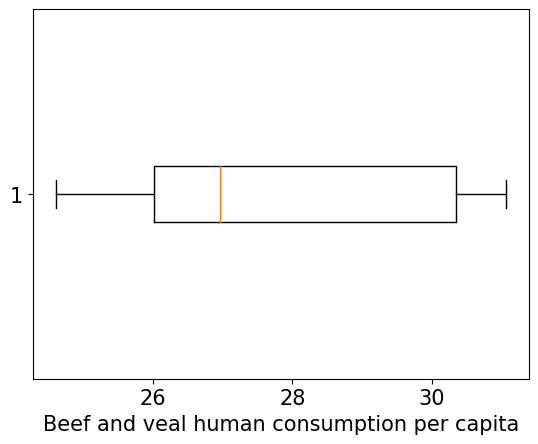

In [ ]:
plt.boxplot(df['Beef and veal_Human consumption per capita'], vert=False)
plt.xlabel('Beef and veal human consumption per capita')
plt.show()

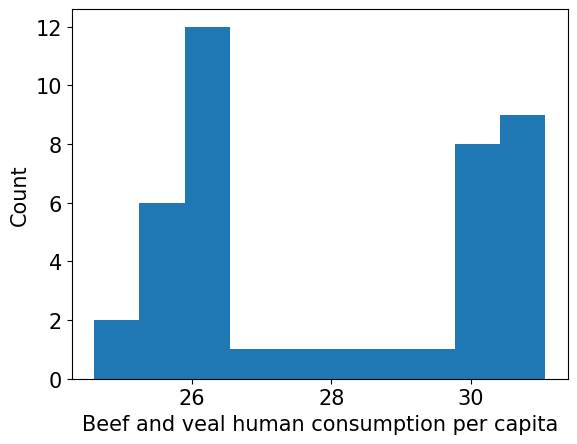

In [ ]:
plt.hist(df['Beef and veal_Human consumption per capita'])
plt.ylabel('Count')
plt.xlabel('Beef and veal human consumption per capita')
plt.show()

In [ ]:
bin_labels = [i for i in range(5)]
df['binned'] = pd.qcut(df['Beef and veal_Human consumption per capita'], q=5, labels=bin_labels)

In [ ]:
X = df.loc[:, df.columns.difference(['Beef and veal_Human consumption per capita', 'binned'])]
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns = X.columns)
y_numerical = df['Beef and veal_Human consumption per capita']
y_categorical = df['binned']

In [ ]:
def evaluate_categorical_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

In [ ]:
def evaluate_numerical_model(model, X, y):
  cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
  return (-scores)**0.5

## Pearson Correlations Between each x feature and y

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Year                                         0.871315
Wheat_Production                             0.479000
Wheat_Ethanol production from commodity           NaN
Wheat_Biodiesel production from commodity         NaN
Wheat_Imports                                0.678511
                                               ...   
ROOTS AND TUBERS_Food Fat availability       0.100901
Agricultural sector_Direct GHG emission      0.532593
Total Calorie availability                   0.286948
Food Protein availability                    0.236217
Food Fat availability                        0.456130
Name: Beef and veal_Human consumption per capita, Length: 637, dtype: float64


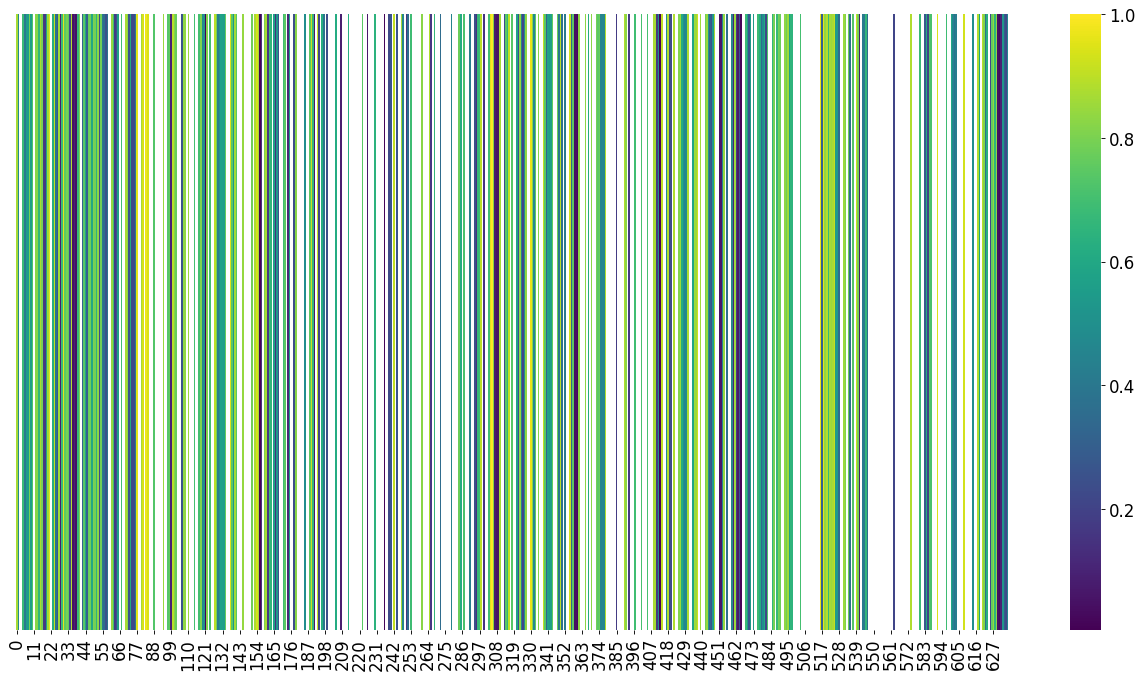

In [ ]:
# Create correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()['Beef and veal_Human consumption per capita']
print(corr_matrix)

# display heatmap
plt.figure(figsize=(20, 10), dpi=80)
#plt.rcParams.update({'font.size': 2})
sns.heatmap(corr_matrix.values.reshape(1, corr_matrix.shape[0]), annot=False, fmt="g", cmap='viridis', yticklabels=False).tick_params(left=False, bottom=True)
plt.show()

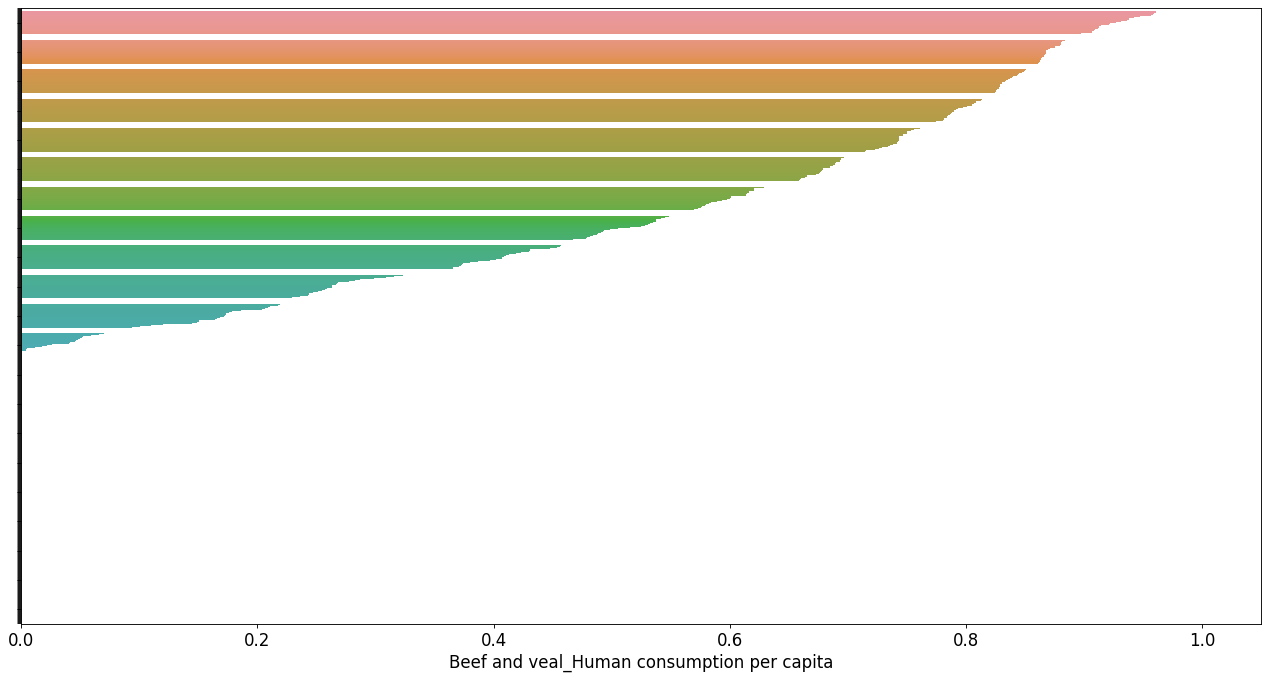

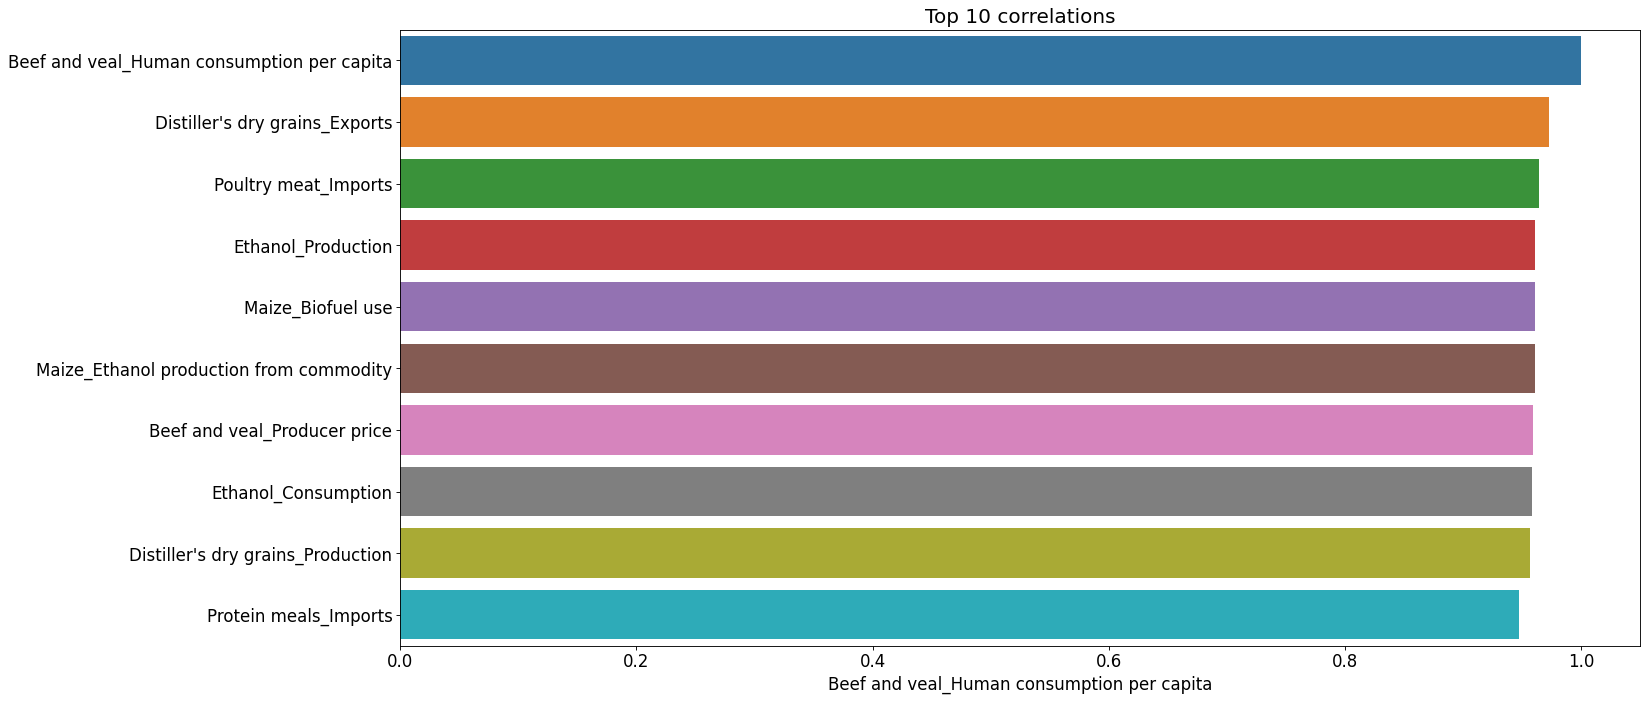

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = corr_matrix.sort_values(ascending=False),
            y = corr_matrix.sort_values(ascending=False).index,
            orient = 'h').set(yticklabels=[])
plt.show()

plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = corr_matrix.sort_values(ascending=False).head(10),
            y = corr_matrix.sort_values(ascending=False).head(10).index,
            orient = 'h')
plt.title('Top 10 correlations')
plt.show()

## Random Forests

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<bound method Series.count of 0     4
1     4
2     3
3     2
4     4
5     4
6     4
7     3
8     4
9     4
10    4
11    3
12    4
13    3
14    3
15    3
16    3
17    3
18    2
19    2
20    2
21    1
22    1
23    0
24    0
25    0
26    0
27    1
28    1
29    2
30    2
31    2
32    2
33    1
34    1
35    1
36    1
37    0
38    0
39    0
40    0
41    0
Name: binned, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]>


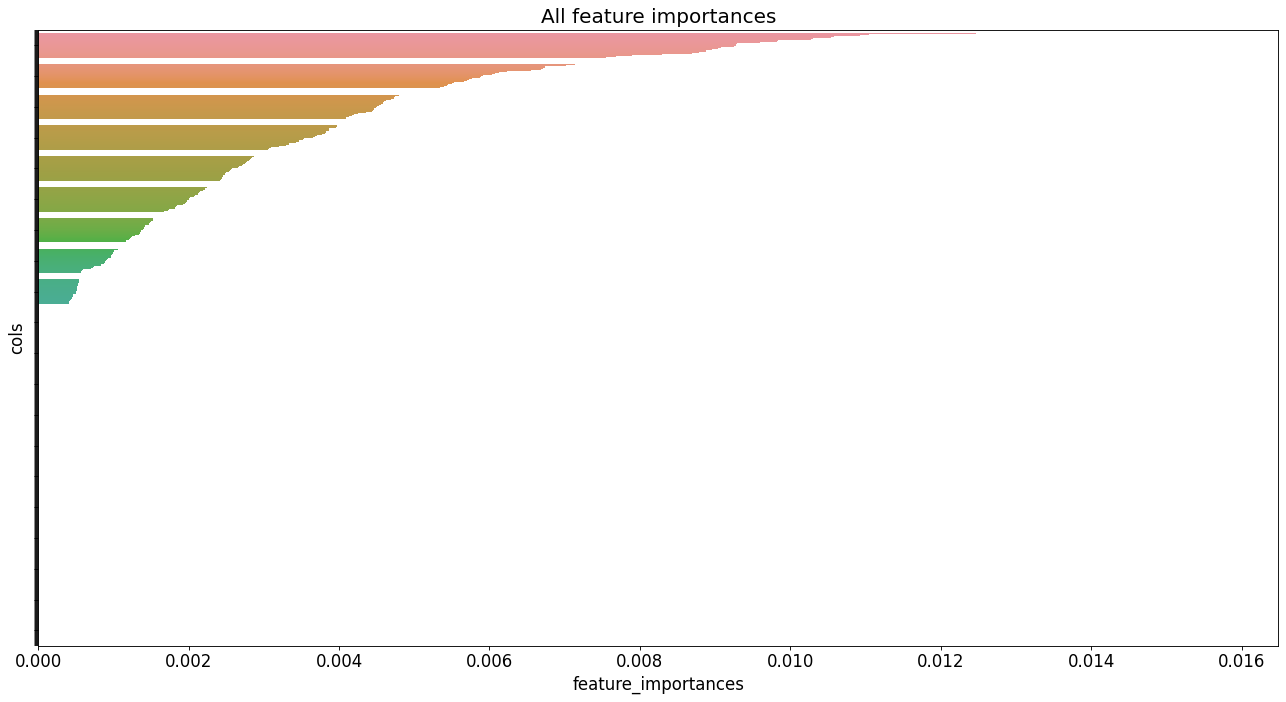

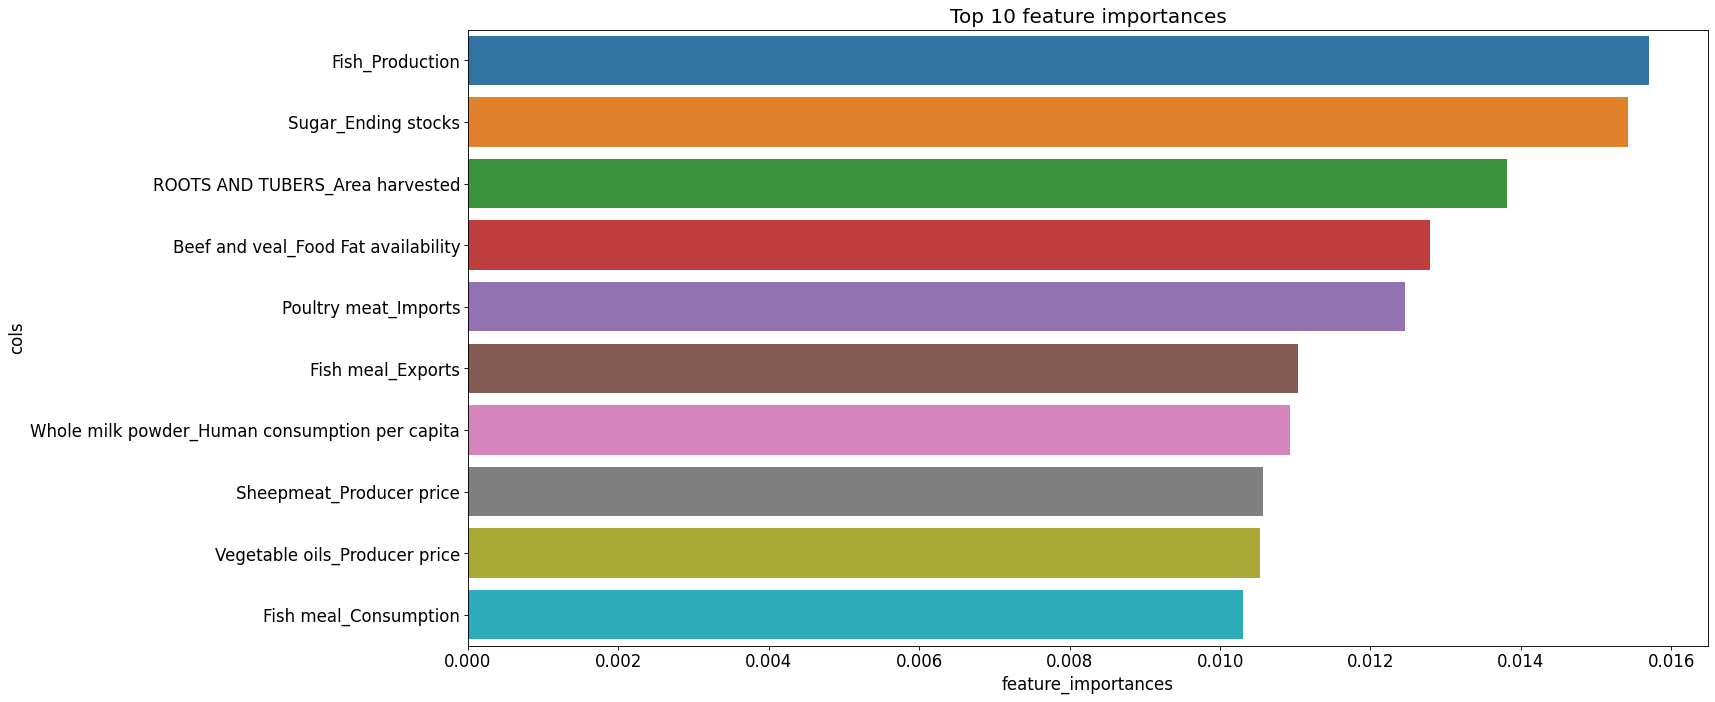

Accuracy: 0.587 (0.125)


In [ ]:
model = RandomForestClassifier()
model.fit(X, y_categorical)
print(y_categorical.count)
feature_importance_df = pd.DataFrame({"cols":X.columns, "feature_importances":model.feature_importances_})


plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False),
            orient = 'h').set(yticklabels=[])
plt.title('All feature importances')
plt.show()


plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False).head(10),
            orient = 'h')
plt.title('Top 10 feature importances')
plt.show()

scores = evaluate_categorical_model(RandomForestClassifier(), X, y_categorical)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

## XGBoostRegressor

https://xgboost.readthedocs.io/en/stable/

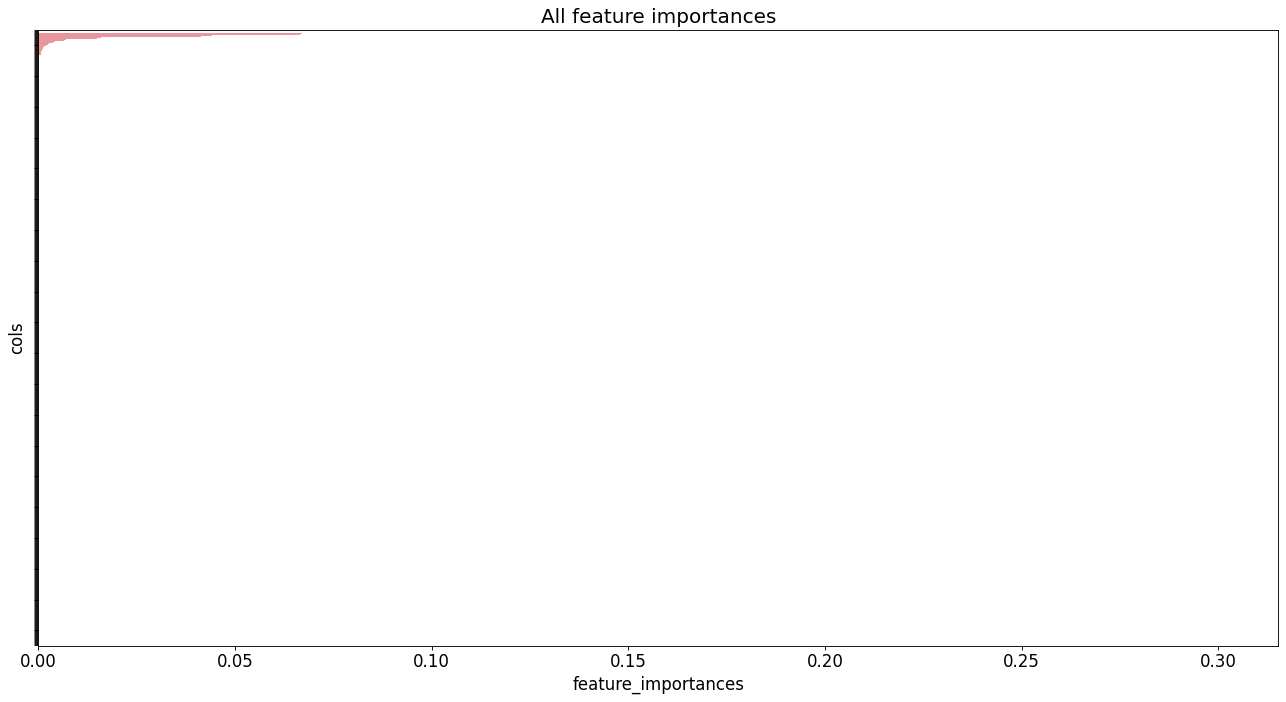

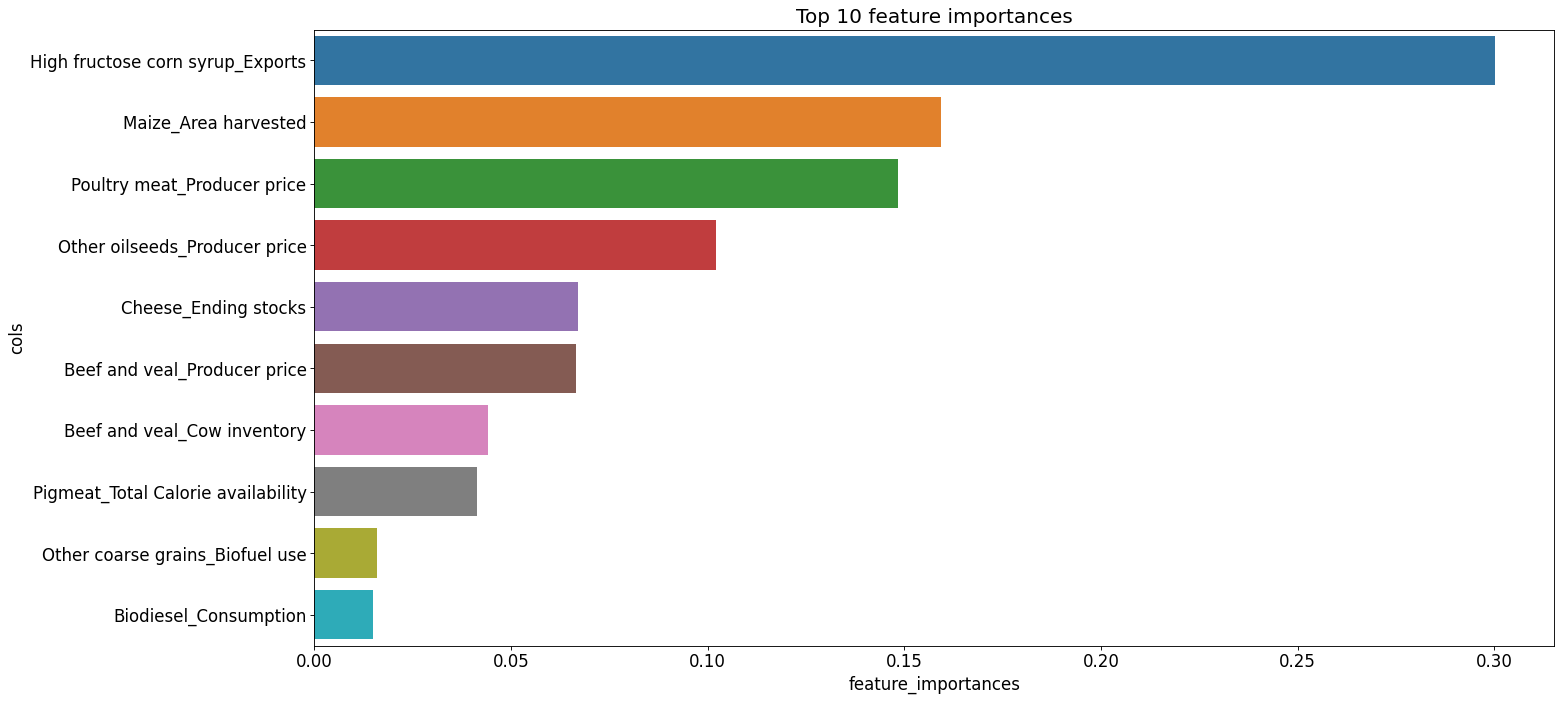

MSE: 0.751 (0.112)


In [ ]:
model = XGBRegressor()
model.fit(X, y_numerical)
feature_importance_df = pd.DataFrame({"cols":X.columns, "feature_importances":model.feature_importances_})
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False),
            orient = 'h').set(yticklabels=[])
plt.title('All feature importances')
plt.show()


plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False).head(10),
            orient = 'h')
plt.title('Top 10 feature importances')
plt.show()

scores = evaluate_numerical_model(XGBRegressor(objective='reg:squarederror'), X, y_numerical)
print('MSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

## XGBoostClassifier

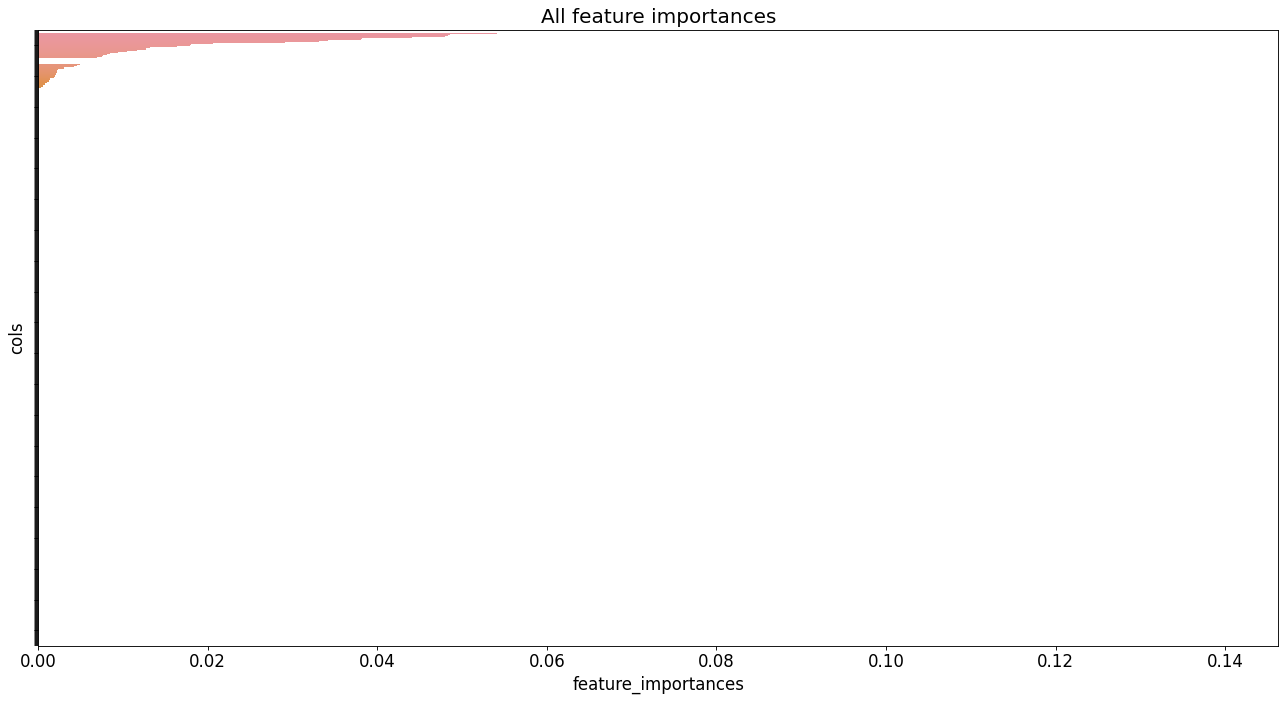

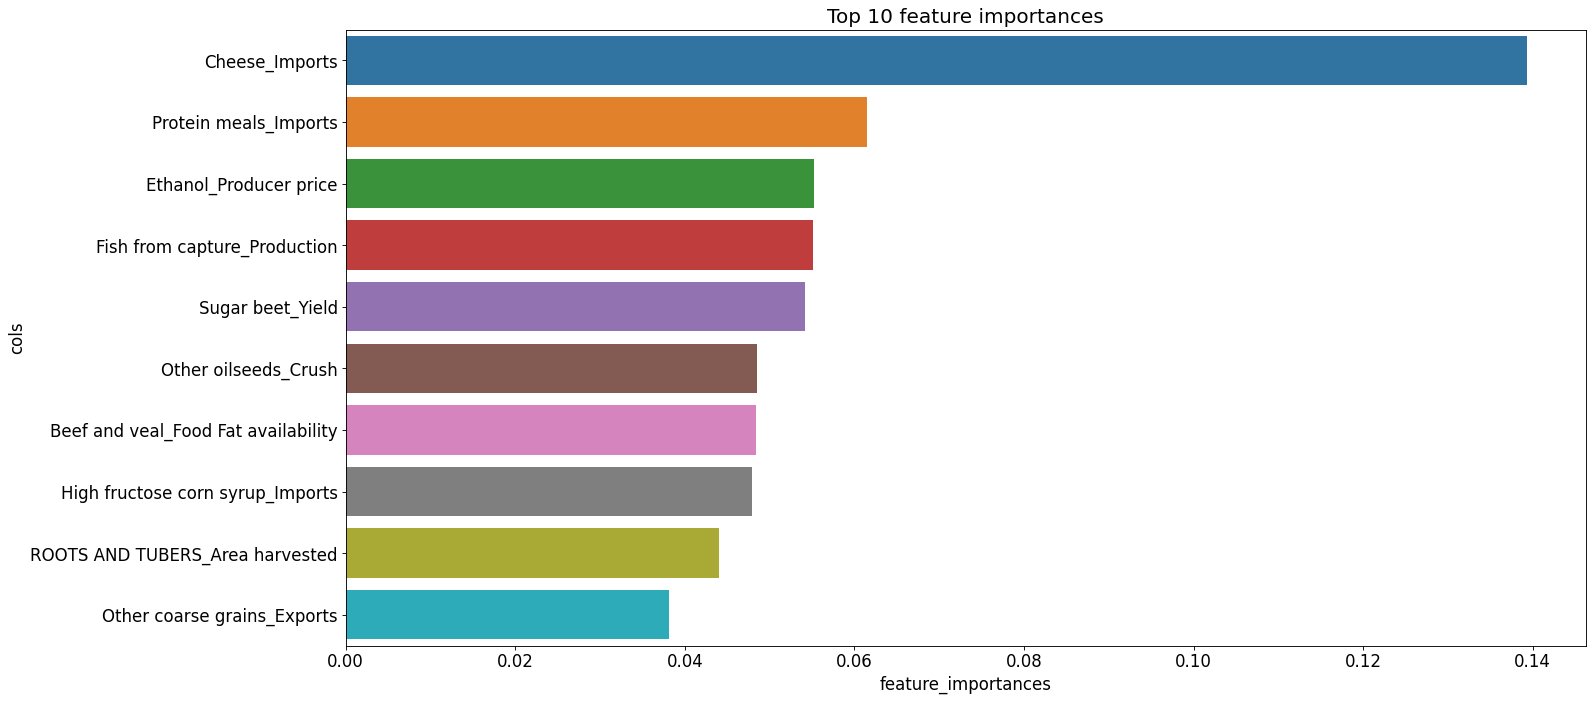

Accuracy: 0.452 (0.071)


In [ ]:
model = XGBClassifier()
model.fit(X, y_categorical)
feature_importance_df = pd.DataFrame({"cols":X.columns, "feature_importances":model.feature_importances_})
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False),
            orient = 'h').set(yticklabels=[])
plt.title('All feature importances')
plt.show()


plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'feature_importances',
            y = 'cols',
            data = feature_importance_df.sort_values('feature_importances', ascending=False).head(10),
            orient = 'h')
plt.title('Top 10 feature importances')
plt.show()
scores = evaluate_categorical_model(XGBClassifier(), X, y_categorical)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

## SVD and Random Forests

In [ ]:
results = []
for i in range(1, len(X.columns)+1, 20):
  steps = [('svd', TruncatedSVD(n_components = i)), ('m', RandomForestClassifier())]
  model = Pipeline(steps=steps)
  scores = evaluate_categorical_model(model, X, y_categorical)
  results.append(scores)
  #print('* %s: Accuracy %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

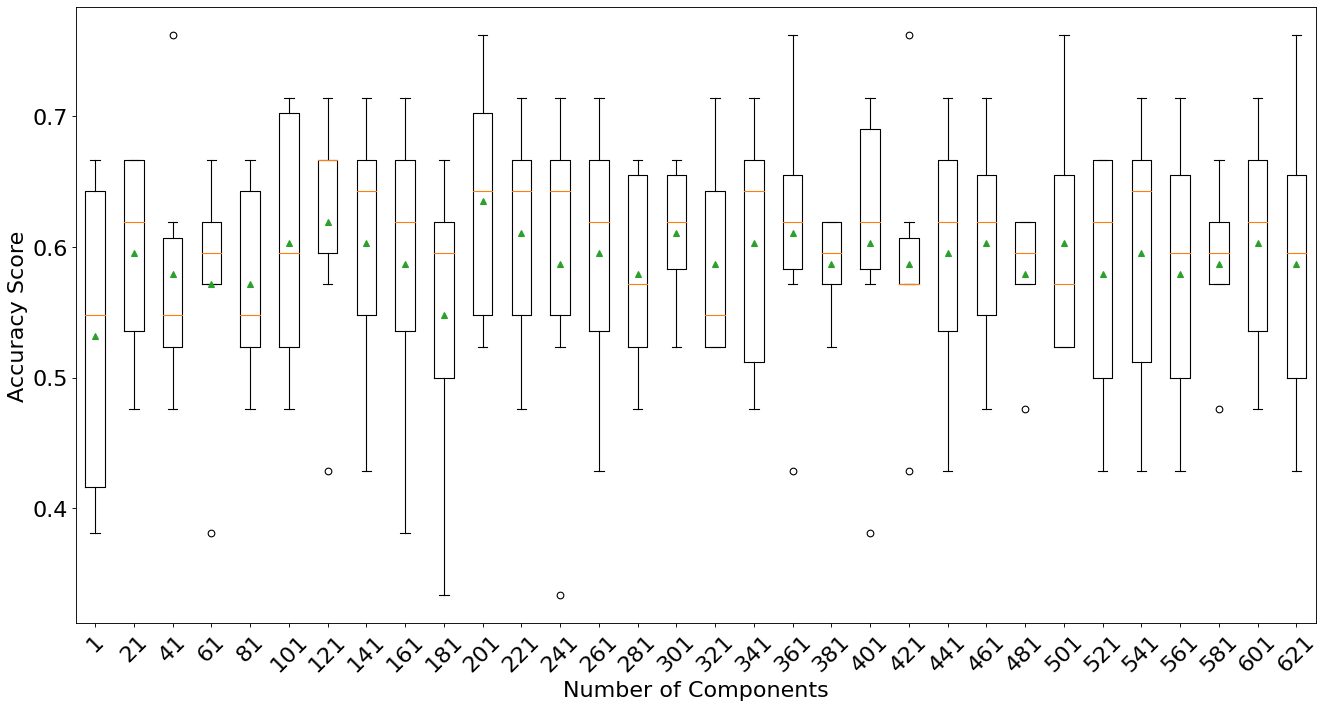

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 20})
plt.boxplot(results, labels=[i for i in range(1, len(X.columns)+1, 20)], showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Components')
plt.show()

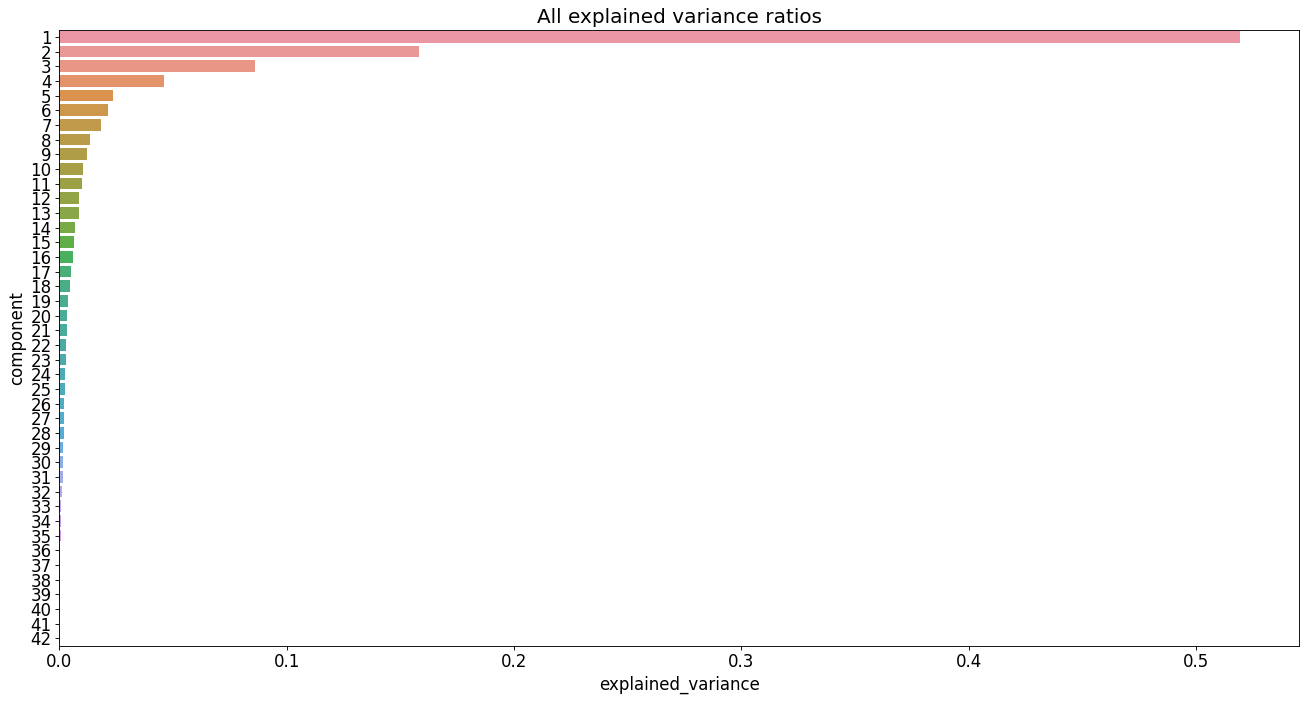

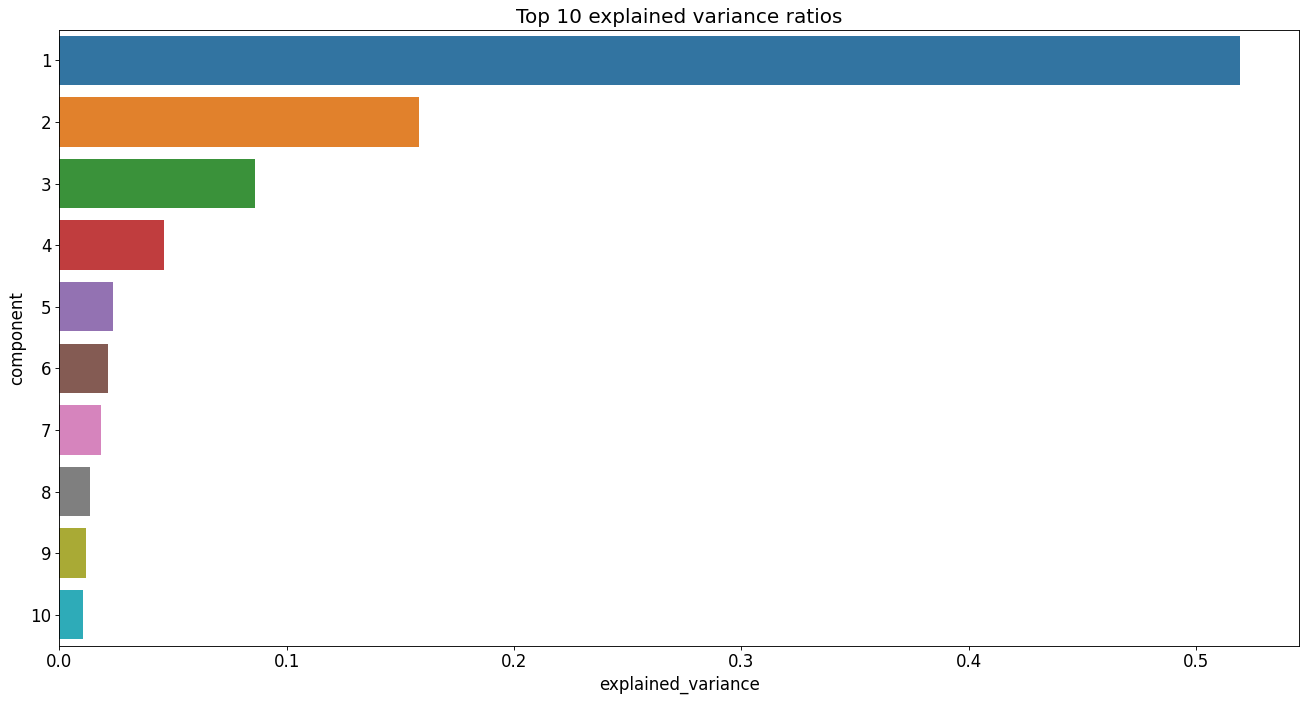

In [ ]:
model = TruncatedSVD(n_components = len(X.columns))
model.fit(X)
feature_importance_df = pd.DataFrame({"component":[i for i in range(1, len(model.explained_variance_ratio_)+1)], "explained_variance":model.explained_variance_ratio_})
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'explained_variance',
            y = 'component',
            data = feature_importance_df.sort_values('explained_variance', ascending=False),
            orient = 'h')
plt.title('All explained variance ratios')
plt.show()


plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'explained_variance',
            y = 'component',
            data = feature_importance_df.sort_values('explained_variance', ascending=False).head(10),
            orient = 'h')
plt.title('Top 10 explained variance ratios')
plt.show()

plt.show()

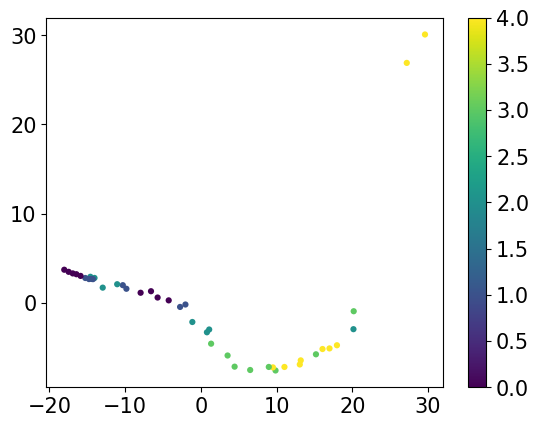

In [ ]:
model = TruncatedSVD(n_components = 2)
embedding = model.fit_transform(X)

plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = df['binned'],
            s = 20, # size
            edgecolor='none')
plt.colorbar()
plt.show()

In [ ]:
model = TruncatedSVD(n_components = 3)
embedding = model.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    embedding, x=0, y=1, z=2, color=df['binned'], size=0.1*np.ones(len(X)), opacity = 1,
    title='SVD plot in 3D',
    labels={'0': 'comp 1', '1': 'comp 2', '2': 'comp 3'},
    width=650, height=500
)
fig.show()

## PCA and RandomForests

* 1: 0.532 (0.118)
* 2: 0.595 (0.102)
* 3: 0.635 (0.094)
* 4: 0.595 (0.090)
* 5: 0.595 (0.090)
* 6: 0.651 (0.065)
* 7: 0.611 (0.089)
* 8: 0.587 (0.094)
* 9: 0.619 (0.048)
* 10: 0.611 (0.093)
* 11: 0.627 (0.093)
* 12: 0.587 (0.059)
* 13: 0.595 (0.053)
* 14: 0.595 (0.071)
* 15: 0.587 (0.059)
* 16: 0.603 (0.076)
* 17: 0.651 (0.081)
* 18: 0.643 (0.077)
* 19: 0.651 (0.076)
* 20: 0.571 (0.078)


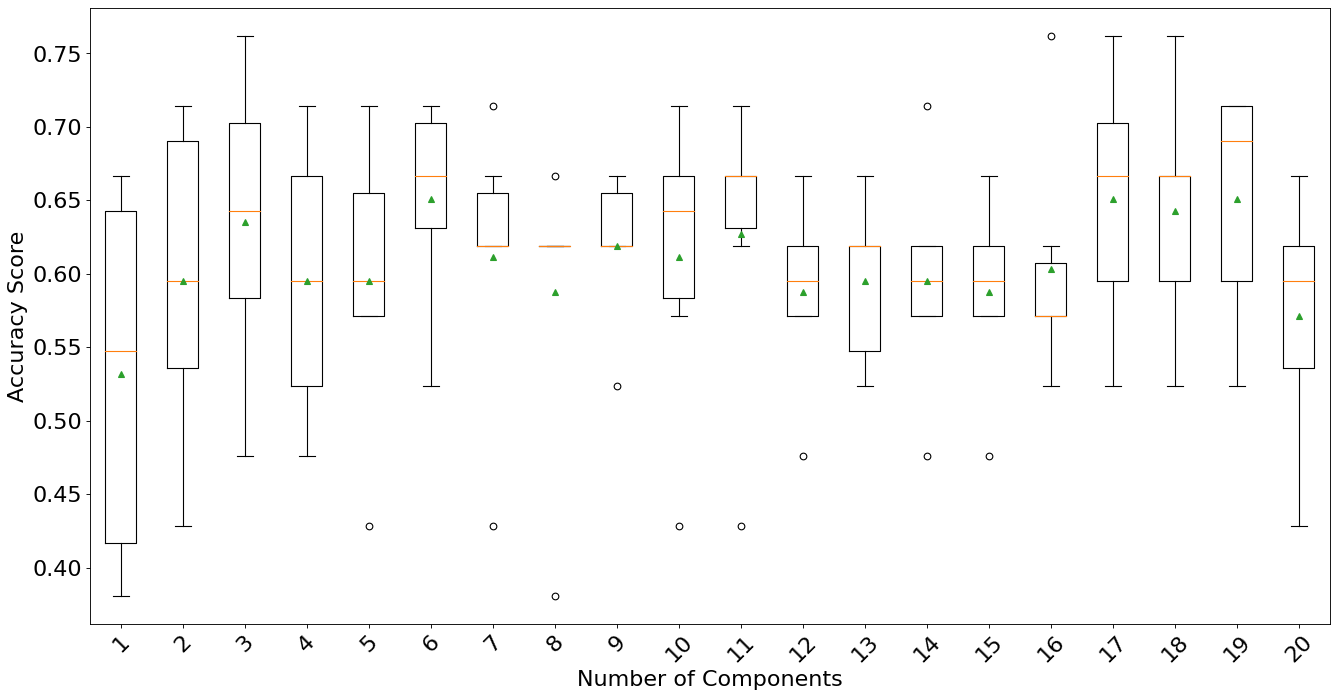

In [ ]:
results = []
for i in range(1, 21):
  steps = [('svd', TruncatedSVD(n_components = i)), ('m', RandomForestClassifier())]
  model = Pipeline(steps=steps)
  scores = evaluate_categorical_model(model, X, y_categorical)
  results.append(scores)
  print('* %s: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 20})
plt.boxplot(results, labels=[i for i in range(1, 21)], showmeans=True)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

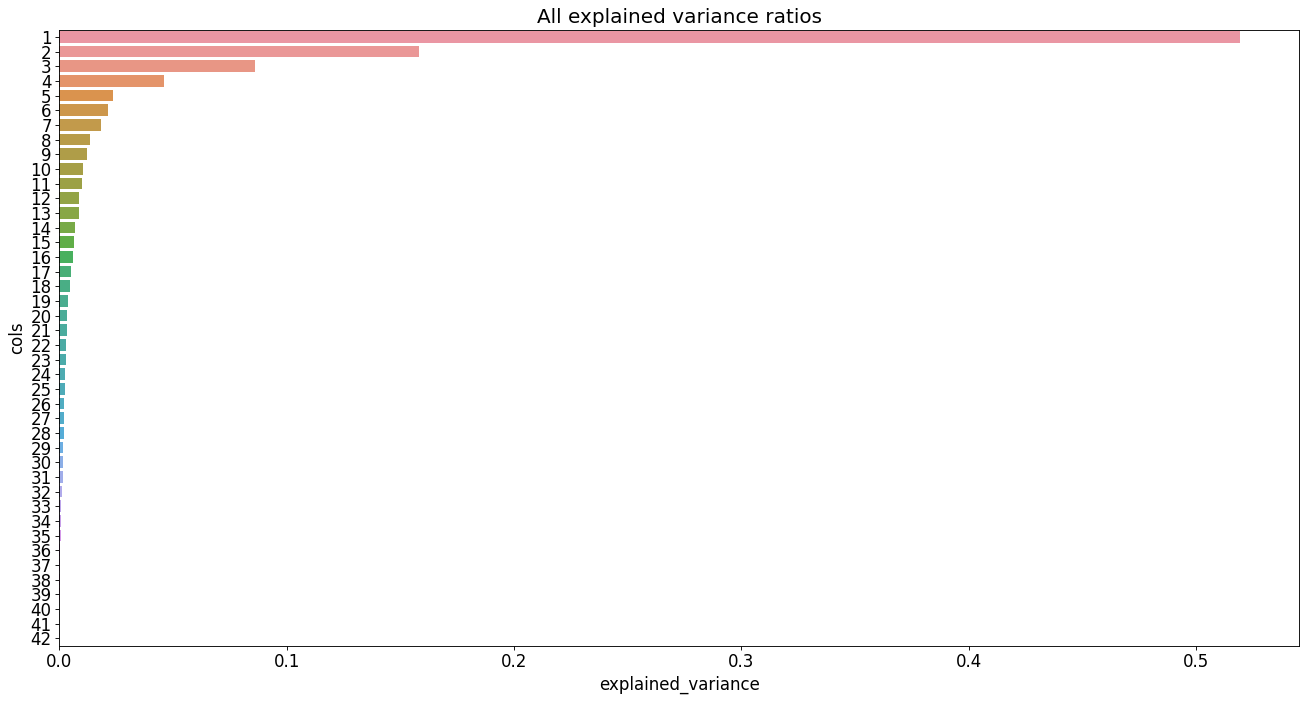

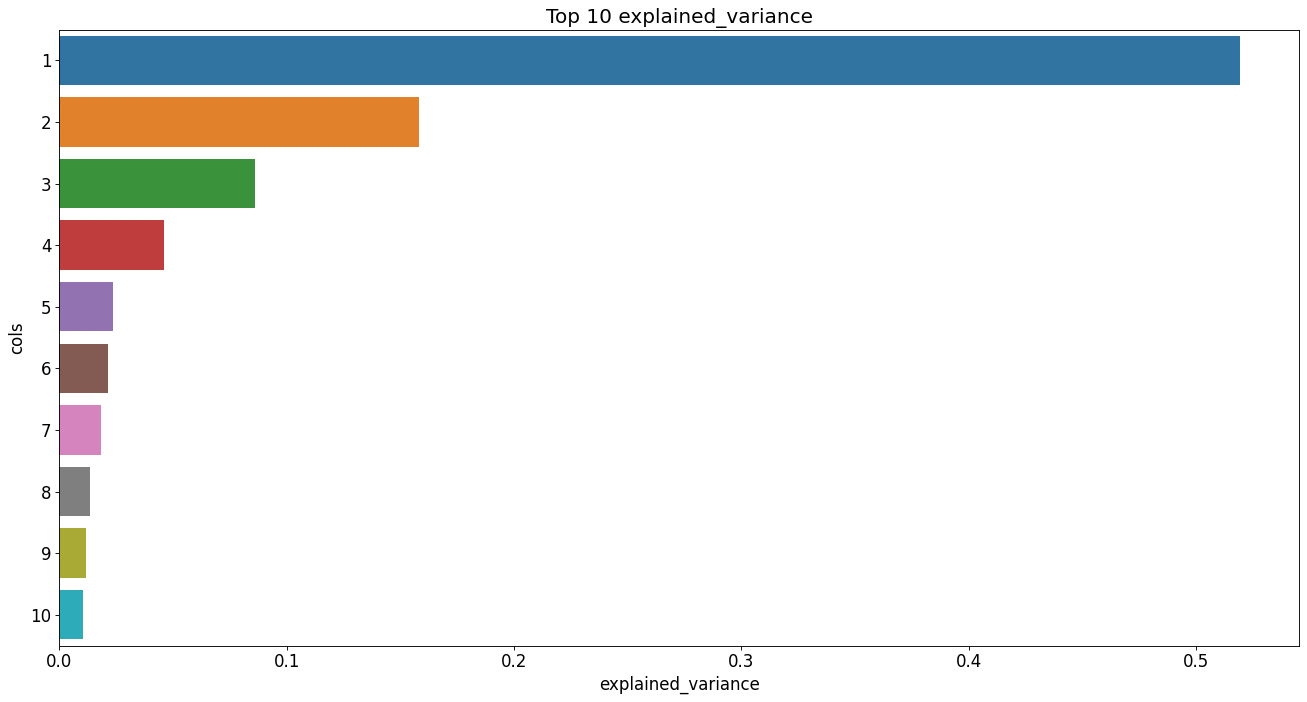

In [ ]:
model = TruncatedSVD(n_components = X.shape[0])
model.fit(X)
feature_importance_df = pd.DataFrame({"cols":[i for i in range(1, X.shape[0]+1)], "explained_variance":model.explained_variance_ratio_})

plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'explained_variance',
            y = 'cols',
            data = feature_importance_df.sort_values('explained_variance', ascending=False),
            orient = 'h')
plt.title('All explained variance ratios')
plt.show()

plt.figure(figsize=(20, 10), dpi=80)
plt.rcParams.update({'font.size': 15})
sns.barplot(x = 'explained_variance',
            y = 'cols',
            data = feature_importance_df.sort_values('explained_variance', ascending=False).head(10),
            orient = 'h')
plt.title('Top 10 explained_variance')
plt.show()

## UMAP and RandomForests

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



* 1: 0.286 (0.110)
* 2: 0.405 (0.109)
* 3: 0.333 (0.106)
* 4: 0.349 (0.090)
* 5: 0.405 (0.113)
* 6: 0.389 (0.101)
* 7: 0.278 (0.101)
* 8: 0.262 (0.053)
* 9: 0.325 (0.070)
* 10: 0.341 (0.111)
* 11: 0.373 (0.089)
* 12: 0.341 (0.084)
* 13: 0.373 (0.064)
* 14: 0.341 (0.104)
* 15: 0.333 (0.067)
* 16: 0.373 (0.111)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



* 17: 0.341 (0.108)
* 18: 0.373 (0.070)
* 19: 0.349 (0.105)


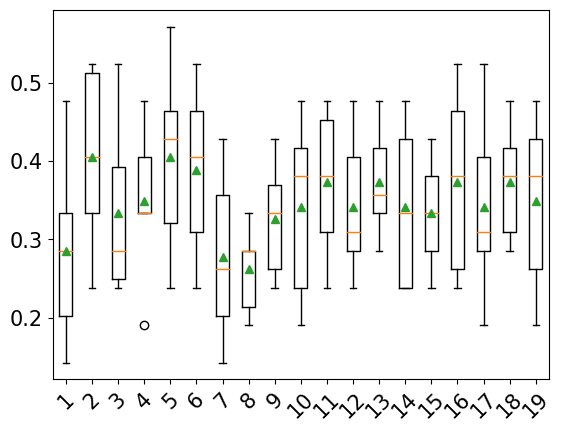

In [ ]:
results = []
for i in range(1, 20):
  steps = [('umap', umap.UMAP(n_components=i)), ('m', RandomForestClassifier())] # Since there should be equal number of neighbors in each group (we are binning by quantiles)
  model = Pipeline(steps=steps)
  scores = evaluate_categorical_model(model, X, y_categorical)
  results.append(scores)
  print('* %s: %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=[i for i in range(1, 20)], showmeans=True)
plt.xticks(rotation=45)
plt.show()

As a non-linear manifold learning technique based on metric spaces rather than feature based data, UMAP does not have a notion of explained variance the way algorithms like PCA do.

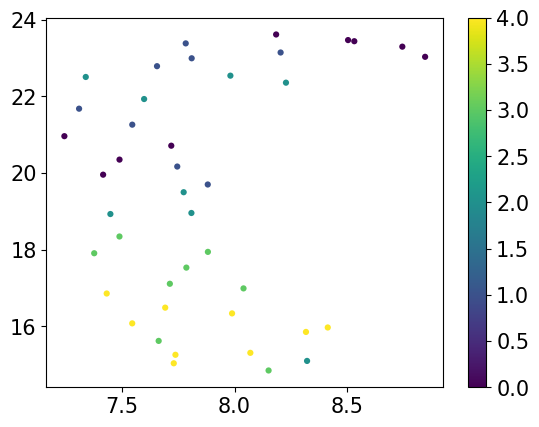

In [ ]:
model = UMAP(n_components = 2)
embedding = model.fit_transform(X)

#plt.figure(figsize=(14,10))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = df['binned'],
            s = 20, # size
            edgecolor='none')
plt.colorbar()
plt.show()

In [ ]:
model = UMAP(n_components = 3)
embedding = model.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    embedding, x=0, y=1, z=2, color=df['binned'], size=0.1*np.ones(len(X)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()